# 4.1 벡터

## 벡터

In [1]:
import numpy as np

#### 벡터의 표현

In [2]:
a = np.array([2,1])
print(a)

[2 1]


type 은 numpy.ndarray

In [3]:
type(a)

numpy.ndarray

In [4]:
c=np.array([[1,2],[3,4]])
print(c)

[[1 2]
 [3 4]]


In [5]:
d=np.array([[1],[2]])
print(d)

[[1]
 [2]]


#### 전치

In [6]:
print(d.T)

[[1 2]]


#### 벡터의 덧셈

In [7]:
a=np.array([2,7])
b=np.array([1,3])
print(a+b)

[ 3 10]


#### 벡터의 뺄셈

In [8]:
a=np.array([2,1])
b=np.array([1,3])
print(a-b)

[ 1 -2]


#### 벡터의 스칼라배

In [9]:
print(2*a)

[4 2]


#### 벡터의 내적

In [10]:
b=np.array([1,3])
c=np.array([4,2])
print(b.dot(c))

10


#### 벡터의 크기

In [11]:
a = np.array([1,3])
print(np.linalg.norm(a))

3.1622776601683795


# 4.1 _after

### 벡터의 차원과 텐서의 차원
벡터의 차원과 텐서의 차원은 다른 개념이다
- 백터에서의 차원은 하나의 축에 차원들이 존재하는것.
- 텐서의 차원은 축의 개수를 의미.

---

### 브로드캐스팅(Broadcasting)
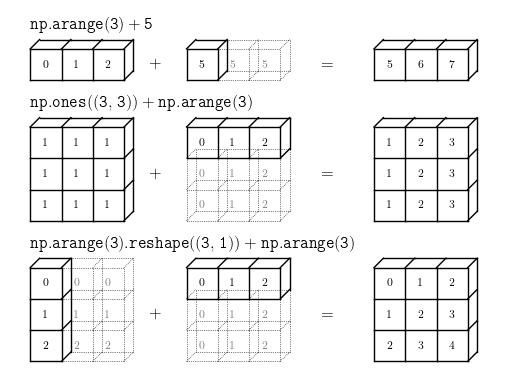
원래 덧셈과 뺄셈은 크기(차원)가 같은 두 벡터나 행렬에 대해서만 할 수 있으나 벡터와 스칼라의 경우는 관례적으로 1-벡터를 사용하여 스칼라를 벡터로 변환한 연산을 허용된다.

브로드캐스팅이 일어날 수 있는 조건
 

- 차원의 크기가 1일때 (벡터일때)
 - 두 배열간 연산에서 최소한 하나의 배열의 차원이 1이면 가능하다.

- 차원의 짝이 맞을 때
 - 차원에 대해 축의 길이가 동일하면 브로드캐스팅이 가능하다.



# 4.2 합의 기호

In [12]:
import numpy as np
a = np.ones(1000)
b = np.arange(1,1001)
print(a.dot(b))

500500.0


# 4.3 곱의 기호

# 4.2 & 4.3 _after

---
### 벡터화 연산
`for i in x: for j in y: i+j`와 같은 반복문을 이용해서 행렬의 연산을 수행하는 것보다 벡터화 연산이 빠르다.

---
### numpy에서 내적
numpy.matmul()함수는 numpy.dot()함수와 비슷해 보이지만, 3차원 이상의 행렬곱을 계산하는 방식이 서로 다르다.

matmul과 dot의 큰 차이점은
- dot는 행렬과 상수(constant)의 곱셈을 허용하지만, matmul은 Error를 일으킨다.
- 3차원 이상의 행렬곱(Tensor multiplication)을 수행할 경우, dot와 matmul은 전혀 다른 결과를 낸다.

np.dot은 두 배열의 내적곱(dot product)이며 np.natmul은 두 배열의 행렬곱(matrix product) 라고한다.



---

딥러닝에서 곱의 쓰임

# 4.4 미분

# 4.5 편미분

w0 와 w1의 함수인 $f(w_0,w_1)$ 를 편미분 
$$f(w_0,w_1)=w_0^2+2 * w_0 * w_1+3$$
$w_0$에서 편미분
$$df/dw_0=2*w_0+2*w_1$$
$w_1$에서 편미분
$$df/dw_1=2*w_0$$
이때 w의 공간을 격자형으로 나누어 각 점에서 경사 	$\nabla_w f$를 화살표로 그리기

- 함수 f,  $w_0$방향의 편미분을 반환하는 함수 ddf_dw0 ,$w_1$방향의 편미분을 반환하는 함수 ddf_dw1정의
- np.meshgrid(m0,m1)에서 격자모양으로 나눈 w0 과 w1을 2차원 배열 ww0, ww1에 저장
- 정의한 함수를 이용하여 ww0과 ww1에대한 편미분값을 계산하고 dff_dw0,dff_dw1에 저장
- ff를 이용하여 등고선과 경사가 화살표로 표시된다

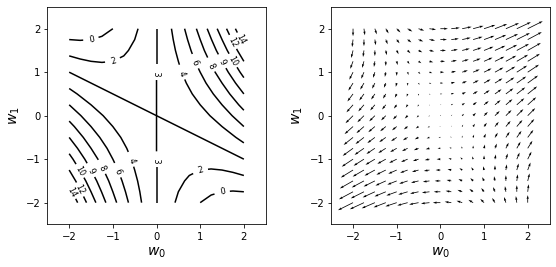

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def f(w0,w1):
    return w0**2+2*w0*w1+3
def df_dw0(w0,w1):
    return 2*w0+2*w1
def df_dw1(w0,w1):
    return 2*w0+0*w1

w_range = 2
dw = 0.25

w0 = np.arange(-w_range, w_range + dw, dw)
w1 = np.arange(-w_range, w_range + dw, dw)
wn =w0.shape[0]
ww0, ww1 = np.meshgrid(w0,w1) 
ff = np.zeros((len(w0),len(w1)))
dff_dw0 = np.zeros((len(w0),len(w1)))
dff_dw1 = np.zeros((len(w0),len(w1)))
for i0 in range(wn):
    for i1 in range(wn):
        ff[i1,i0] = f(w0[i0],w1[i1])
        dff_dw0[i1,i0] = df_dw0(w0[i0],w1[i1])
        dff_dw1[i1,i0] = df_dw1(w0[i0],w1[i1])
        
plt.figure(figsize=(9,4))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
cont = plt.contour(ww0,ww1,ff,10,colors='k')
cont.clabel(fmt='%2.0f',fontsize=8)
plt.xticks(range(-w_range,w_range+1,1))
plt.yticks(range(-w_range,w_range+1,1))
plt.xlim(-w_range-0.5,w_range+0.5)
plt.ylim(-w_range-0.5,w_range+0.5)
plt.xlabel('$w_0$',fontsize=14)
plt.ylabel('$w_1$',fontsize=14)

plt.subplot(1,2,2)
plt.quiver(ww0,ww1,dff_dw0,dff_dw1)
plt.xlabel('$w_0$',fontsize=14)
plt.ylabel('$w_1$',fontsize=14)
plt.xticks(range(-w_range,w_range+1,1))
plt.yticks(range(-w_range,w_range+1,1))
plt.xlim(-w_range-0.5,w_range+0.5)
plt.ylim(-w_range-0.5,w_range+0.5)
plt.show()

- 등고선 level을 이용하여 높이 확인가능.
- 경사가 가파를수록 등고선의 간격이 좁고 화살표가 길다.
- 화살표는 경사가 높은 부분으로 진행된다. 이를 이용하여 함수의 최대,최소점을 찾는대에 사용 될 수 있다

### code
- plt.contour -> 등고선
- plt.quiver -> 화살표
- 그래프를 그리기위해 함수값을 저장할때그래프의 모양이 역전됨으로 x축 y축 순서를 반대로 넣어준다


# 4.4 & 4.5 _after

## 기울기
모든 변수의 편미분을 벡터로 정리한 것이 기울기(gradient) 이다

---

기울기가 가리키는 방향은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다.

---

경사법(경사 하강법)
>신경망은 학습시 최적의 매개변수를 찾아야한다.
손실 함수가 최솟값이 될 때의 매개변수를 최적값이라 하는데, 일반적으로 손실 함수는 매우 복잡하다.
이 때 기울기를 이용하여 함수의 최솟값을 찾으려는 것이 경사법이다.
각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기이다.

>경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다.
도착한 곳에서도 마찬가지로 기울기를 구하고, 그 방향으로 나아가기를 반복한다.
위 방법으로 함수의 값을 점차 줄여나가는 것을 경사법(gradient method)이라고 한다.
> - 경사 하강법, 경사 상승법이 존재하지만, 방법론에는 큰 의미가 없고, 주로 경사 하강법으로 많이 등장한다.

---


# 4.6 행렬

In [14]:
import numpy as np

#### 행렬의 표현

In [15]:
A=np.array([[1,2,3],[4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [16]:
B=np.array([[7,8,9],[10,11,12]])
print(B)

[[ 7  8  9]
 [10 11 12]]


#### 행렬의 덧셈

In [17]:
print(A+B)
print(A-B)

[[ 8 10 12]
 [14 16 18]]
[[-6 -6 -6]
 [-6 -6 -6]]


#### 행렬의 스칼라 배

In [18]:
A=np.array([[1,2,3],[4,5,6]])
print(2*A)

[[ 2  4  6]
 [ 8 10 12]]


#### 행렬의 곱(내적)

In [19]:
A=np.array([1,2,3])
B=np.array([4,5,6])
print(A.dot(B))

32


#### 행렬의 요소 곱

In [20]:
A=np.array([1,2,3])
B=np.array([4,5,6])
print(A*B)

[ 4 10 18]


#### 행렬의 요소 나눗셈

In [21]:
A=np.array([1,2,3])
B=np.array([4,5,6])
print(A/B)

[0.25 0.4  0.5 ]


행렬의 내적에서

A가 L * M 행렬
B가 M * N 행렬일때
AB의 크기는 L * M 이다 

In [22]:
A = np.array([[1,2,3],[-1,-2,-3]])
B = np.array([[4,-4],[5,-5],[6,-6]])
print(A.dot(B))

[[ 32 -32]
 [-32  32]]


#### 단위행렬

In [23]:
print(np.identity(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [24]:
A=np.array([[1,2,3],[4,5,6],[7,8,9]])
I=np.identity(3)
print(A.dot(I))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


#### 역행렬

In [25]:
A=np.array([[1,2],[3,4]])
invA=np.linalg.inv(A)
print(invA)

[[-2.   1. ]
 [ 1.5 -0.5]]


#### 전치

In [26]:
A=np.array([[1,2,3],[4,5,6]])
print(A)
print(A.T)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


# 4.6 _after

## 행렬의 사용

고전적인 회귀모델을 쓰지 않고 행렬방식의 인공지능을 쓰는 이유

- 데이터 노이즈를 귀납적인 행렬연산으로 필터링할 수있다
- 고정된 수학적인 모델값이 아니라 데이터 변화에 대한 학습을 통해 예측모델을 진화시킬 수 있다

 정제되지 않는 방대한 데이터의 노이즈를 해소하고 빠르게 예측된 해를 찾게 해 주기위해 행렬을 사용한다
 
---

데이터는 다차원의 특징을 갖는다. 따라서 numerical 한 표현을 하기위해 벡터가 쓰이고, 컴퓨터의 연산에서 벡터의 최적화된 행렬 연산을 사용하게된다.


---

# 4.7 지수함수와 로그함수

## 지수함수

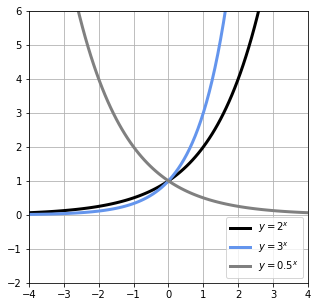

In [27]:
import numpy as np
import matplotlib.pyplot as pit
%matplotlib inline
x = np.linspace(-4,4,100)
y=2**x
y2=3**x
y3=0.5**x

plt.figure(figsize=(5,5))
plt.plot(x,y,'black',linewidth=3,label='$y=2^x$')
plt.plot(x,y2,'cornflowerblue',linewidth=3,label='$y=3^x$')
plt.plot(x,y3,'gray',linewidth=3,label='$y=0.5^x$')
plt.ylim(-2,6)
plt.xlim(-4,4)
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()

#### a 를 밑으로한 지수함수
$$ y = a^x $$

- a>1 일때 x가 증가하면 y 도 증가 -> 단조증가
- 0<a<1 일때 의경우 -> 단조감소
- 밑 a 가 클수록 그래프의 기울기가 급격히 증가한다
- 지수함수는 음수와 양수를 모두 양수로 옯기는 함수이다


## 로그함수

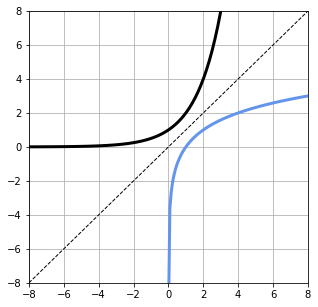

In [28]:
x = np.linspace(-8,8,100)
y=2**x

x2=np.linspace(0.001,8,100)
y2 = np.log(x2) /np.log(2)
plt.figure(figsize=(5,5))
plt.plot(x,y,'black',linewidth=3)
plt.plot(x2,y2,'cornflowerblue',linewidth=3)
plt.plot(x,x,'black',linestyle='--',linewidth=1)
plt.ylim(-8,8)
plt.xlim(-8,8)
plt.grid(True)
plt.show()

a를 밑으로 한 로그함수
$$y=log_a x$$
- $y=a^x$그래프와 y=x 선에서 대칭
- 그래프는 a>0에서만 정의된다
- x가 커지면 커질수록 그래프는 증가하고, 기울기는 완만해진다.

- 큰숫자를 처리할때 log를 이용하여 오버플로를 방지할 수 있다
- 최소화하는 $f=x^a$를 구할때 단조증가함수인 log를 이용하여 $log(f(x))$를 최소화 시키면, $f=x^a$또한 최소화가 된다

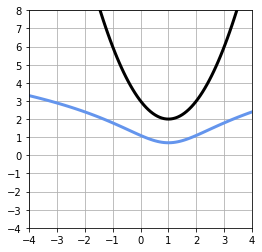

In [29]:
x = np.linspace(-4,4,100)
y= (x-1)**2+2
logy = np.log(y)

plt.figure(figsize=(4,4))
plt.plot(x,y,'black',linewidth=3)
plt.plot(x,logy,'cornflowerblue',linewidth=3)
plt.yticks(range(-4,9,1))
plt.xticks(range(-4,5,1))
plt.ylim(-4,8)
plt.xlim(-4,4)
plt.grid(True)
plt.show()

로그를 취해도 최솟값을 취하는 값은 변하지 않는다
$$argmin(f(x)) = argmin(logf(x))$$

$f(x)=(x-1)^2+2$ 는 $x=1$일때, 최솟값을 가진다.

$log(f(x))=log((x-1)^2+2)$ 도 $x=1$일때, 최솟값을 가진다.

## 지수함수의 미분
$y=a^x$의 미분은
$$y'=(a^x)'=a^x log(a)$$

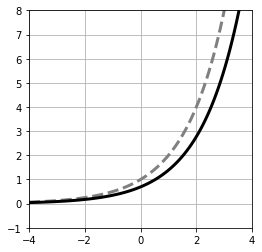

In [30]:
x = np.linspace(-4,4,100)
a=2
y=a**x
dy=np.log(a)*y

plt.figure(figsize=(4,4))
plt.plot(x,y,'gray',linestyle='--',linewidth=3)
plt.plot(x,dy,color='black',linewidth=3)
plt.ylim(-1,8)
plt.xlim(-4,4)
plt.grid(True)
plt.show()

- $a = e$ 의경우 미분에도 함수의 형태가 변하지 않는다

## log함수의 미분

$log(x)$을 미분하면
$$y'(x)=(log(x))'=1/x$$

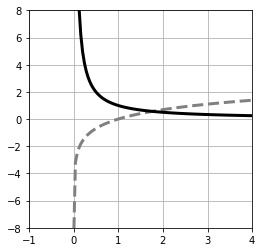

In [31]:
x=np.linspace(0.0001,4,100)
y=np.log(x)
dy=1/x

plt.figure(figsize=(4,4))
plt.plot(x,y,'gray',linestyle='--',linewidth=3)
plt.plot(x,dy,color='black',linewidth=3)
plt.ylim(-8,8)
plt.xlim(-1,4)
plt.grid(True)
plt.show()

- 반비례식인 $1/x$의 형태이다

## 시그모이드 함수

$$y=1/(1+exp(-x))$$
형태의 함수

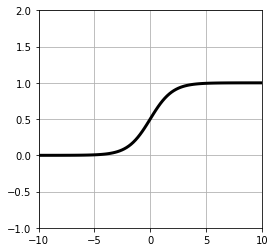

In [32]:
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.figure(figsize=(4,4))
plt.plot(x,y,'black',linewidth=3)

plt.ylim(-1,2)
plt.xlim(-10,10)
plt.grid(True)
plt.show()

미분의 형태는
   $$ y' = y(1-y)$$
시그모이드 함수는 0에서 1 사이의 값으로 변환하기 때문에 확률을 나타낼때 자주 사용

## 소프트맥스 함수

In [33]:
def softmax(x0,x1,x2):
    u=np.exp(x0)+np.exp(x1)+np.exp(x2)
    return np.exp(x0) / u, np.exp(x1) / u, np.exp(x2) / u

y=softmax(2,1,-1)
print(np.round(y,2))
print(np.sum(y))

[0.71 0.26 0.04]
1.0


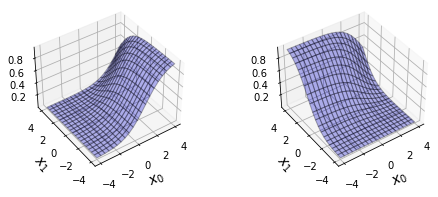

In [34]:
from mpl_toolkits.mplot3d import Axes3D

xn =20
x0 = np.linspace(-4,4,xn)
x1 = np.linspace(-4,4,xn)

y=np.zeros((xn,xn,3))

for i0 in range(xn):
    for i1 in range(xn):
        y[i1,i0,:]=softmax(x0[i0],x1[i1],1)
        
xx0,xx1 = np.meshgrid(x0,x1)
plt.figure(figsize=(8,3))
for i  in range(2):
    ax = plt.subplot(1,2,i+1,projection='3d')
    ax.plot_surface(xx0,xx1,y[:,:,i],
                    rstride=1,cstride=1,alpha=0.3
                   ,color='blue',edgecolor='black')
    ax.set_xlabel('$x_0$',fontsize=14)
    ax.set_ylabel('$x_1$',fontsize=14)
    ax.view_init(40,-125)

plt.show()

#### K변수의 소프트맥스 함수
$$y_i=exp(x_i)/\sum_{j=0}^{K-1} exp(x_j)$$
$x_i$로 미분하면
$$dy_i/dx_i = y_j(I-y_i)$$
$I$는 $i=j$의 경우 1, $i \neq j$의 경우 0이 되는 함수이다

## 소프트맥스 함수와 시그모이드 함수

시그모이드 함수를 다변수로 확장한것이 소프트맥스 함수이다

## 가우스 함수

가우스 함수는
       $$y=exp(-x^2)$$
의 형태이다

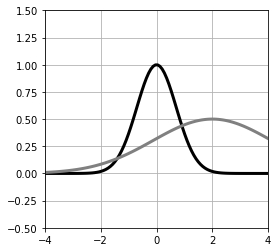

In [35]:
def gauss(mu,sigma,a):
    return a*np.exp(-(x-mu)**2/sigma**2)

x=np.linspace(-4,4,100)
plt.figure(figsize=(4,4))
plt.plot(x,gauss(0,1,1),'black',linewidth=3)
plt.plot(x,gauss(2,3,0.5),color='gray',linewidth=3)
plt.ylim(-.5,1.5)
plt.xlim(-4,4)
plt.grid(True)
plt.show()

#### 가우스 함수
$$y = a*exp(-(x-\mu)^2/\sigma^2)$$

$\mu$ : 중심(평균)

$\sigma$ : 확산(표준편차)

a : 높이


x로 적분하여 1 로 만들려면 (a는 전체 확률이 1이기위한 적분상수)
$$a=1/(2\pi \sigma^2)^{1/2}$$


연속형 확률 변수에서 가우시안 분포는 변수의 엔트로피를 최대화하는 분포이다.

## 2차원 가우스 함수

동심원을 가진 종모양

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

def gauss(x,mu,sigma):
    N,D = x.shape
    c1=1/(2*np.pi)**(D/2)
    c2=1/(np.linalg.det(sigma)**(1/2))
    inv_sigma = np.linalg.inv(sigma)
    c3 = x-mu
    c4 = np.dot(c3, inv_sigma)
    c5=np.zeros(N)
    for d in range(D):
        c5 = c5 +c4[:,d]*c3[:,d]
    p = c1*c2*np.exp(-c5/2)
    return p

In [37]:
x=np.array([[1,2],[2,1],[3,4]])
mu = np.array([1,2])
sigma = np.array([[1,0],[0,1]])
print(gauss(x,mu,sigma))

[0.15915494 0.05854983 0.00291502]


In [ ]:
X_range0=[-3,3]
X_range1=[-3,3]

def show_contour_gauss(mu,sig):
    xn=40
    x0 = np.linspace(X_range0[0],X_range0[1],xn)
    x1 = np.linspace(X_range1[0],X_range1[1],xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
    f = gauss(x,mu,sig)
    f = f.reshape(xn,xn)
    f = f.T
    cont = plt.contour(xx0,xx1,f,15, colors='k')
    plt.grid(True)

    
def show3d_gauss(ax,mu,sig):
    xn=40
    x0 = np.linspace(X_range0[0],X_range0[1],xn)
    x1 = np.linspace(X_range1[0],X_range1[1],xn)
    xx0,xx1 = np.meshgrid(x0,x1)
    x =np.c_[np.reshape(xx0,xn*xn,'F'),np.reshape(xx1,xn*xn,'F')]
    f = gauss(x,mu,sig)
    f = f.reshape(xn,xn)
    f = f.T
    ax.plot_surface(xx0,xx1,f,
                   rstride=2,cstride=2,alpha=0.3,
                   color='blue',edgecolor='black')
    
mu = np.array([1,0.5])
sigma = np.array([[2,1],[1,1]])
Fig = plt.figure(1,figsize=(7,3))
Fig.add_subplot(1,2,1)
show_contour_gauss(mu,sigma)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.xlabel('$x_0$',fontsize=14)
plt.ylabel('$x_1$',fontsize=14)
Ax = Fig.add_subplot(1,2,2, projection='3d')
show3d_gauss(Ax,mu,sigma)
Ax.set_zticks([0.05,0.10])
Ax.set_xlabel('$x_0$',fontsize=14)
Ax.set_ylabel('$x_1$',fontsize=14)
Ax.view_init(40,-100)
plt.show()

- 분포의 중심은 (1, 0.5)
- $\sigma_2=1$ 상향확산분포가 되었다
    - 찌그러진 정도가 적을수록( 원에 가까울 수록) → 상관계수 = 0
    - 찌그러진 정도가 클수록 → 상관계수 = 1

일반적인 2차원 가우스 함수

입력벡터

$$x= [x_0 x_1]^T$$

#### Multivariate Gaussian Normal(다변량 가우시안 정규 분포)
$$y=a*exp((-1/2)(x- \mu)^t (\sum)^{-1}(x-\mu))$$

매개변수(파라미터)
 - $\sum$은 공분산행렬
 - $\mu$는 평균벡터(중심벡터)
 
적분하여 1 이 되려면
    $$a=(1/2\pi)(1/|\sum|^{1/2})$$

### code
- np.linalg.inv(x) :X의 역행렬 반환
- np.reshape의 order 
    - 'F' : 첫 번째 인덱스가 가장 빠르게 변경되고 마지막 인덱스가 가장 느리게 변경
    - 'C' :마지막 축 인덱스가 가장 빠르게 변경되고 다시 첫 번째 축 인덱스가 가장 느리게 변경

### 추가
#### Multivariate Gaussian Normal(다변량 가우시안 정규 분포)
$$ \mathcal{N}(x ; \mu, \Sigma) = \dfrac{1}{(2\pi)^{D/2} |\Sigma| ^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right) $$

- μ 에서 x 까지의 마할라노비스 거리(Mahalanobis distance) 라고 부른다
- 연속형 확률 변수에서 가우시안 분포는 변수의 엔트로피를 최대화하는 분포이다.

참고링크 
-  http://norman3.github.io/prml/docs/chapter02/3_1.html
- https://namyoungkim.github.io/probability/statistics/2017/09/11/probability_2/#Multivariate-Gaussian-Normal(%EB%8B%A4%EB%B3%80%EB%9F%89-%EA%B0%80%EC%9A%B0%EC%8B%9C%EC%95%88-%EC%A0%95%EA%B7%9C-%EB%B6%84%ED%8F%AC)

# 4.7 _after

## 활성함수
딥러닝 네트워크에서는 노드에 들어오는 값들에 대해 곧바로 다음 레이어로 전달하지 않고 주로 비선형 함수를 통과시킨 후 전달한다. 이때 사용하는 함수를 활성화 함수(Activation Function) 이라 부른다.

여기서 주로 비선형 함수를 사용하는 이유는 선형함수를 사용할 시 층을 깊게 하는 의미가 줄어들기 때문이다.

> 선형함수인 h(x)=cx를 활성화함수로 사용한 3층 네트워크를 떠올려 보세요. 이를 식으로 나타내면 y(x)=h(h(h(x)))가 됩니다. 이는 실은 y(x)=ax와 똑같은 식입니다. a=c3이라고만 하면 끝이죠. 즉, 은닉층이 없는 네트워크로 표현할 수 있습니다. 뉴럴네트워크에서 층을 쌓는 혜택을 얻고 싶다면 활성화함수로는 반드시 비선형 함수를 사용해야 합니다. 

> \- 밑바닥부터 시작하는 딥러닝 -

- 따라서 Neutral network 에서 층을 쌓는 효과를 얻기위해 활성함수를 비선형함수로 사용한다.

---
## sigmoid

### sigmoid에 대해 특징
- 우선 함수값이 (0, 1)로 제한된다.
- 중간 값은 1/2이다.
- 매우 큰 값을 가지면 함수값은 거의 1이며, 매우 작은 값을 가지면 거의 0이다.
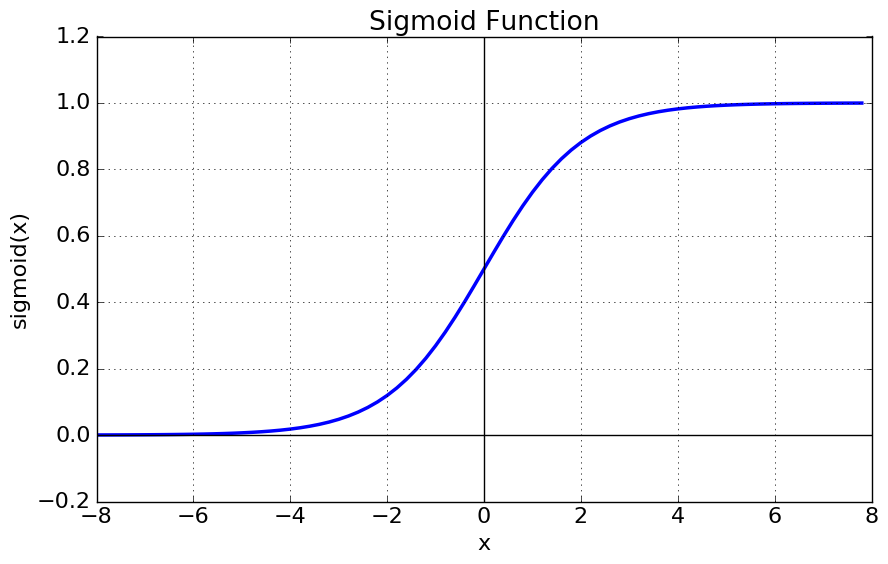

### sigmoid의 단점

- Gradient Vanishing 현상이 발생한다.
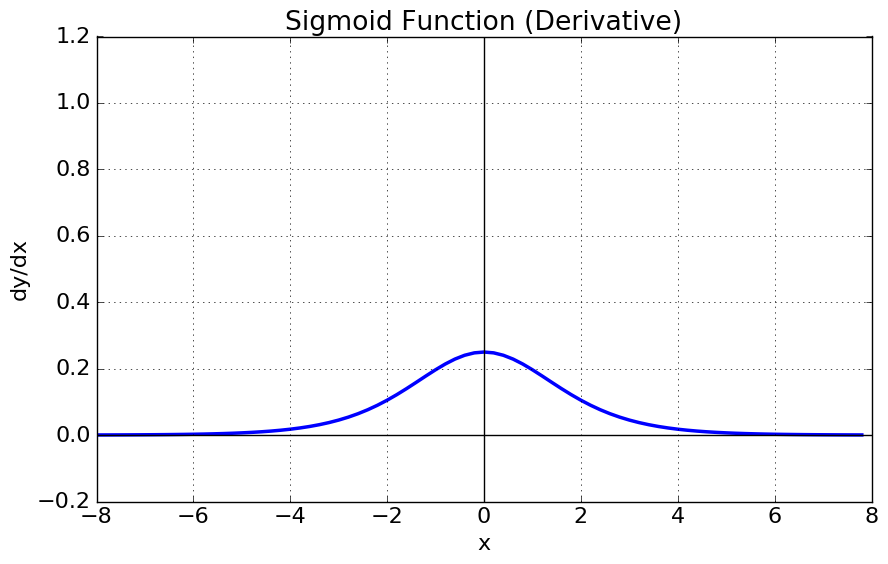
 - 미분함수에 대해 x=0에서 최대값 1/4 을 가지고, input값이 일정이상 올라가면 미분값이 거의 0에 수렴하게된다. 이는 |x|값이 커질 수록 Gradient Backpropagation시 미분값이 소실될 가능성이 크다.
- 함수값 중심이 0이 아니다. 
 - 함수값 중심이 0이 아니라 학습이 느려질 수 있다. 
> 만약 모든 x값들이 같은 부호(ex. for all x is positive) 라고 가정하고 아래의 파라미터 w에 대한 미분함수식을 살펴보자. ∂L/∂w=(∂L/∂a)*(∂a/∂w) 그리고 ∂a/∂w=x이기 때문에, ∂L/∂w=(∂L/∂a)*x 이다. 위 식에서 모든 x가 양수라면 결국 ∂L/∂w는 ∂L/∂a 부호에 의해 결정된다. 따라서 한 노드에 대해 모든 파라미터w의 미분값은 모두 같은 부호를 같게된다. 따라서 같은 방향으로 update되는데 이러한 과정은 학습을 zigzag 형태로 만들어 느리게 만드는 원인이 된다.
- exp 함수 사용시 비용이 크다.

---

## softmax

softmax function는
exponential 지수함수를 사용하여 큰값은 더 크게 작은값은 더 작게 값을 반환해준다.
이는 최대값을 반환해주는 max 함수를 부드럽게 이은모양으로 그래프로 표현된다

---

## softmax 함수의 한 가지 문제점

```python
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y
```


 지수 함수 그래프에서도 봤듯이 x값이 10 이상으로 커지면 y값은 기하급수적으로 커진다. 컴퓨터로 계산할 땐 값이 일정 이상 커지면 그 값이 초기화되는 오버플로우 문제가 발생한다.

 따라서 출력층 값 중 가장 큰 값으로 모든 출력층의 값을 빼주는 방법을 사용할 수 있다. 그럼 출력층의 최대값이 0이 되어 오버플로우 문제가 해결할 수 있다
```python
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y
```

---

2차원 가우스 함수함수는 분산의 정보를 이용한 Multivariate Gaussian Normal(다변량 가우시안 정규 분포)를 이용하기때문에 일반적인 유클리드 거리나 맨하탄 거리에비해 많은 정보를 가지고있어 데이터간의 거리를 더욱 잘 표현해준다